<a href="https://colab.research.google.com/github/SandraSreebi/Color-Identification/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 SPARKS FOUNDATION-IoT & COMPUTER VISION INTERNSHIP(GRIP JULY 2021)


BY-SANDRA SREEBI


TASK 2:Implement an image color detector which identifies all the colors in an
image .

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

The type of this input is <type 'numpy.ndarray'>
Shape: (175, 289, 3)


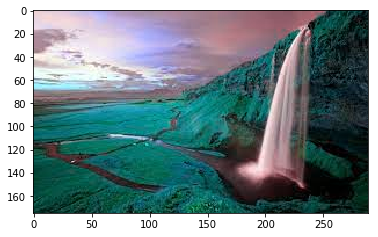

In [ ]:
image = cv2.imread('sample_data/image/im1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

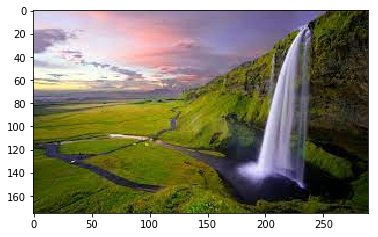

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

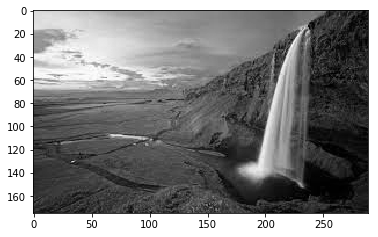

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

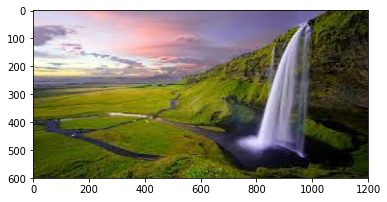

In [ ]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([53.59375219, 56.84574555, 24.47347254]),
 array([231.68818053, 218.79690705, 225.52426227]),
 array([91.85409219, 98.00707877, 14.93595966]),
 array([85.18786176, 83.57960101, 83.3202585 ]),
 array([197.71759195, 165.73530912, 176.66073002]),
 array([19.78022118, 20.78371679,  9.58227406]),
 array([135.89518036, 123.43857885, 152.30440101]),
 array([136.93015657, 134.84374858,  26.3732698 ])]

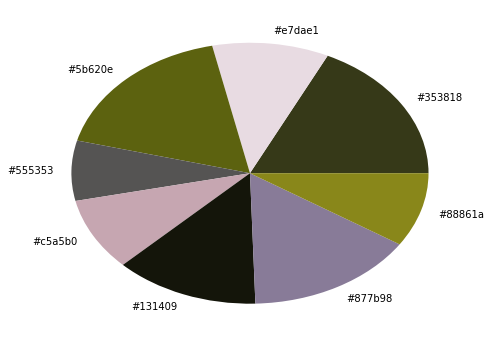

In [ ]:
get_colors(get_image('sample_data/image/im1.jpg'), 8, True)